<p><a name="sections"></a></p>


# Index
**Skills used**
* Markdown
* Pandas Ninjitsu
  * cleaning
  * formatting
  * subsetting
  * etc
* Static Charting
* Interactive Charting 
* Decorators
* Formatting & styling
* List comprehensions

In [5]:
import pandas as pd               #data wrangling
import bokeh as bk
#pd.options.plotting.backend = 'plotly'
#pd.set_option('plotting.backend', 'plotly')

In [6]:
import ipywidgets as ipw          #interactive visualizations
import seaborn as sns             #static visualizations
from matplotlib import pyplot as plt #core charting

import numpy as np                #arithmetic definitions

from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
from IPython.display import clear_output
from ipywidgets import interact

%matplotlib inline

In [8]:
#launch side console to explore data
#%qtconsole

### Dataset Ingest
<p>[Fatal Encounters Website](https://fatalencounters.org/ "Fatal Encounters") </p>
<p>[Washington Post](https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv "Washington Post") </p>
<p>[Mapping Police Violence](https://mappingpoliceviolence.org/s/MPVDatasetDownload.xlsx "Mapping Police Violence") </p>


**Excel File**

In [9]:
#https://fatalencounters.org/
filename = 'FATAL ENCOUNTERS__.xlsx'
sheetname = 'FATAL ENCOUNTERS'
statepop = 'statepop.xlsx'


In [10]:
dataset = pd.read_excel(filename, sheetname)
population = pd.read_excel(statepop)

In [11]:
dataset.describe(include='all')

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,Longitude,Agency responsible for death,Cause of death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS","Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
count,28162.000000,28163,27186,28069,28162,27770,27762,12805,28163,27625,...,28162.000000,28094,28162,28162,28101,3,7,2.000000,28162.000000,28155.000000
unique,NaN,26818,182,5,8,10,6967,12751,7174,25886,...,NaN,6285,15,91,4,3,7,NaN,NaN,NaN
top,NaN,Name withheld by police,22,Male,European-American/White,European-American/White,not imputed,http://castle.eiu.edu/media/images/2009/anusha...,2003-02-19 00:00:00,2347 S. Michigan Ave.,...,NaN,Los Angeles Police Department,Gunshot,Unreported,No,https://youtu.be/M62Va6Ft2cw,2/22/2016: Mission police received a call for ...,NaN,NaN,NaN
freq,NaN,1120,902,25398,9087,13352,19342,3,23,21,...,NaN,468,20004,10351,18715,1,1,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-01 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2100-12-31 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,14081.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-95.427694,NaN,NaN,NaN,NaN,NaN,NaN,27829.500000,14081.500000,2011.045143
std,8129.813477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.371178,NaN,NaN,NaN,NaN,NaN,NaN,470.226009,8129.813477,5.777429
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-165.591880,NaN,NaN,NaN,NaN,NaN,NaN,27497.000000,1.000000,2000.000000
25%,7041.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-111.326381,NaN,NaN,NaN,NaN,NaN,NaN,27663.250000,7041.250000,2006.000000


**From URLs**

In [12]:
#Washington Post via github
webfile = 'https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv'
webdata = pd.read_csv(webfile)

URLError: <urlopen error [Errno 110] Connection timed out>

In [ ]:
url2 = 'https://mappingpoliceviolence.org/s/MPVDatasetDownload.xlsx'
sheetname = '2013-2019 Police Killings'
mpvd = pd.read_excel(url2, sheetname)

### Clean & Explore Webfile

In [ ]:
#convert this column to a 'date' datatype
webdata.date= pd.to_datetime(webdata.date)

In [ ]:
#add a column called 'year' to the df
webdata['year'] = pd.DatetimeIndex(webdata['date']).year

In [ ]:
webdata.sample(5)

In [ ]:
#mpvd.dtypes

In [16]:
#mpvd['Cause of death'].value_counts()

In [157]:
#temp = mpvd[mpvd['Cause of death']=='Beaten']

In [17]:
#temp

In [18]:
#most common 'armed' status
webdata.groupby('armed').city.count().sort_values(ascending=False).nlargest(10)

armed
gun               3060
knife              792
unarmed            353
toy weapon         186
undetermined       164
vehicle            139
unknown weapon      79
machete             43
Taser               26
ax                  24
Name: city, dtype: int64

**Plot as a barchart**

In [19]:
#save results to a dataframe
temp = pd.DataFrame(webdata.groupby('armed').city.count().sort_values(ascending=False).nlargest(10))
temp.reset_index(inplace=True)

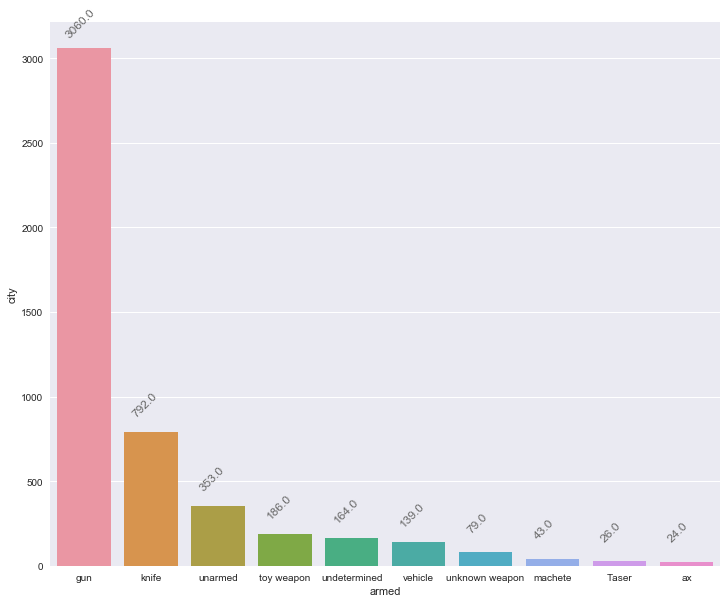

In [22]:
#override default chartsize with custom size
sns.set(rc={'figure.figsize':(12,10)})

#use default seaborn color scheme
sns.set_style()

#create bachart figure as 'ax'
ax = sns.barplot(x='armed',
                 y='city',
                 data = temp)

# label bars with values
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height()+200, \
            str(round((i.get_height()), 2)), color='dimgrey',
                rotation=45)

### show details of table using `pivot_table()`

In [24]:
#list of arithmetic to perform on each field
agglist = ('count', 'mean', 'min', 'max')

#build new table
temp = webdata.pivot_table(index=['armed'], values='age', aggfunc=agglist)

#sort highest to lowest and set floats to two decimal places
temp.sort_values('count', ascending=False).head(15).style.format("{:.2f}")

,count,max,mean,min
armed,,,,
gun,2930.00,91.00,38.24,14.00
knife,752.00,76.00,37.13,14.00
unarmed,347.00,84.00,32.44,6.00
toy weapon,180.00,77.00,35.79,13.00
undetermined,148.00,66.00,34.85,16.00
vehicle,130.00,57.00,32.68,16.00
unknown weapon,69.00,74.00,38.01,16.00
machete,42.00,83.00,39.88,20.00
Taser,26.00,69.00,36.15,20.00


In [25]:
#drilldown on victim with baseball bats. sort by age
webdata[webdata.armed == 'baseball bat'].sort_values('age', ascending=False)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1768,1975,Deborah Danner,2016-10-18,shot,baseball bat,66.0,F,B,Bronx,NY,True,attack,Not fleeing,False
2617,2907,Ricky Ard,2017-08-29,shot,baseball bat,55.0,M,B,Evansville,IN,True,other,Not fleeing,True
1474,1655,Terry Lynn Maurer,2016-06-26,shot,baseball bat,51.0,M,W,Columbia Township,MI,True,attack,Not fleeing,False
3167,3497,Michael Ward,2018-03-12,shot and Tasered,baseball bat,46.0,M,B,Manhasset,NY,False,attack,Not fleeing,False
4854,5266,Mauro Carrillo,2019-12-10,shot,baseball bat,42.0,M,H,Hesperia,CA,False,attack,Not fleeing,False
2956,3272,Jonathan William Leroy,2018-01-06,shot,baseball bat,39.0,M,W,McLoud,OK,False,other,Not fleeing,False
1836,2124,Jonathan M. Young,2016-11-13,shot and Tasered,baseball bat,38.0,M,NaN,Bloomsburg,PA,True,attack,Not fleeing,False
1285,1465,Clemente Najera,2016-04-15,shot,baseball bat,38.0,M,H,Lake Elsinore,CA,False,other,Not fleeing,False
3959,4362,David Novak,2019-01-07,shot,baseball bat,35.0,M,W,Spokane,WA,False,attack,Not fleeing,True
4268,5416,Saoun Pol,2019-05-04,shot,baseball bat,35.0,M,A,Stockton,CA,False,attack,Not fleeing,False


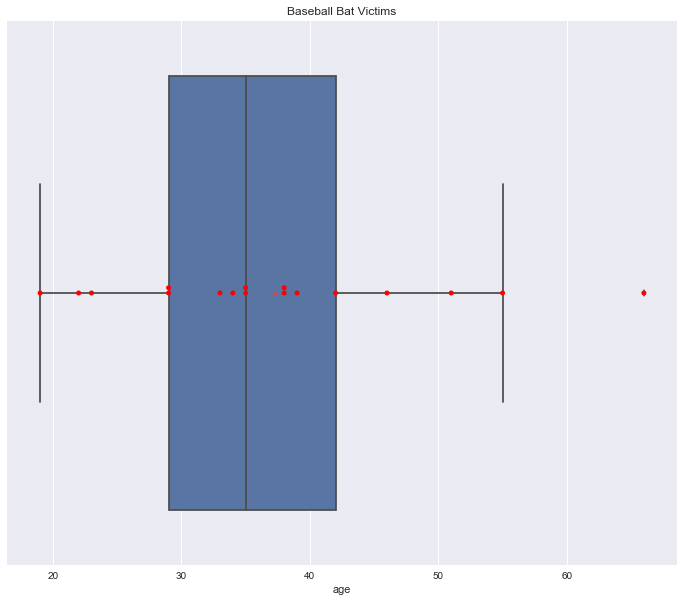

In [35]:
temp = webdata[webdata.armed == 'baseball bat'].sort_values('age', ascending=False)

ax = sns.boxplot(data=temp, x='age', showmeans=True).set_title('Baseball Bat Victims')
ax = sns.swarmplot(data=temp, x='age', color='red')
plt.title ="test"

In [36]:
#drilldown on unarmed Blacks
unarmedblk = webdata[(webdata.armed == 'unarmed') & (webdata.race == 'B')]

In [37]:
unarmedblk.describe()

,id,age
count,123.000000,120.000000
mean,2478.073171,32.275000
std,1676.620035,10.958257
min,36.000000,15.000000
25%,991.000000,24.000000
50%,2343.000000,30.000000
75%,3729.500000,38.000000
max,5873.000000,61.000000


In [38]:
#overall populates of unarmed victims sorted by race
temp_ = webdata[webdata.armed == 'unarmed'].race.value_counts(normalize=True)

#convert to dataframe to leverage .style.format() method
pd.DataFrame(temp_).style.format("{:.2%}")

,race
W,41.95%
B,35.34%
H,18.10%
A,2.01%
O,1.44%
N,1.15%


In [39]:
webdata.groupby('threat_level').state.count().sort_values(ascending=False).nlargest(10)

threat_level
attack          3495
other           1682
undetermined     239
Name: state, dtype: int64

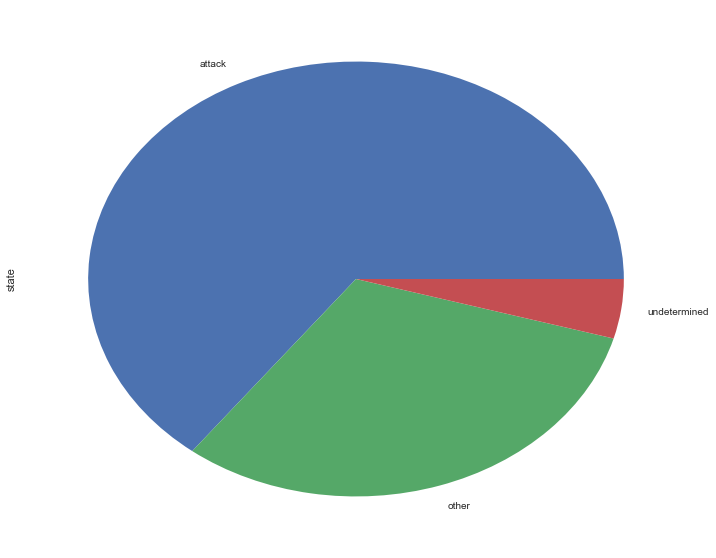

In [41]:
temp = webdata.groupby('threat_level').state.count().sort_values(ascending=False).nlargest(10)
temp.plot(kind='pie');

### Interactive Version of Pie Chart

In [47]:
#set chart size
sns.set(rc={'figure.figsize':(6,6)})

#create a lsit of all the states from the dataframe
statelist=sorted(webdata[webdata.state.notna()]['state'].unique().tolist())

#create plotting function link it to a dropdown of states
@interact(state=statelist)
def plot_threat(state):
        temp = webdata[webdata.state==state]
        temp.groupby('threat_level').state.count().plot(kind='pie')

interactive(children=(Dropdown(description='state', options=('AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'), value='AK'), Output()), _dom_classes=('widget-interact',))

In [48]:
sns.set(rc={'figure.figsize':(6,6)})
agerange=np.linspace(0,100,51)


def plot_agethreat(ages):
        temp = webdata[webdata.age >= ages]
        temp.groupby('threat_level').state.count().plot(kind='pie')

@interact(plot_agethreat, ages=ipw.IntSlider(min=0, max=100, step=2, value=24))


In [14]:
webdata.age.describe(percentiles=[.33,.5,.66])

count    5150.000000
mean       37.131650
std        13.117681
min         6.000000
33%        30.000000
50%        35.000000
66%        41.000000
max        91.000000
Name: age, dtype: float64

In [15]:
#Crosstab state by flee
pd.crosstab(webdata.state, webdata.flee)

flee,Car,Foot,Not fleeing,Other
state,,,,
AK,7,8,20,1
AL,19,11,66,6
AR,9,11,55,0
AZ,37,31,164,11
CA,124,105,505,21
CO,48,34,95,9
CT,6,3,11,0
DC,1,2,9,1
DE,4,0,8,1


-------------

## Fata Encounters Excel File

**Setset main dataset to something manageable**

In [52]:
dataset.columns

Index(['Unique ID', 'Subject's name', 'Subject's age', 'Subject's gender',
       'Subject's race', 'Subject's race with imputations',
       'Imputation probability', 'URL of image of deceased',
       'Date of injury resulting in death (month/day/year)',
       'Location of injury (address)', 'Location of death (city)',
       'Location of death (state)', 'Location of death (zip code)',
       'Location of death (county)', 'Full Address', 'Latitude', 'Longitude',
       'Agency responsible for death', 'Cause of death',
       'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS',
       'Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS', 'Video',
       'Date&Description', 'Unique ID formula',
       'Unique identifier (redundant)', 'Date (Year)'],
      dtype='object')

In [54]:
newdf = pd.DataFrame([])  #empty dataframe to fill up

In [55]:
#use .filter(like=) to subset---.query() as alternative?
newdf['city'] = dataset.filter(like='city')
newdf['year']= dataset.filter(like='Year')
newdf['state']= dataset.filter(like='state')
newdf['race'] = dataset.filter(like='race with')
newdf['age'] = dataset.filter(['Subject\'s age'])
newdf['ID'] = dataset.filter(['Unique ID'])
newdf['county']= dataset.filter(like='county')
newdf['zip']= dataset.filter(like='zip')
newdf['cause']= dataset.filter(like='Cause')
newdf['agency']= dataset.filter(like='Agency')


In [56]:
# convert age column from 'object' datatype
newdf['age']= pd.to_numeric(newdf['age'], errors='coerce')

In [57]:
#look for #na in year column
newdf.year.isna().value_counts()

False    28155
True         8
Name: year, dtype: int64

In [58]:
newdf.dropna(subset=['year'], inplace=True)

In [59]:
newdf.year = newdf.year.astype(int)

In [60]:
newdf.dtypes

city       object
year        int32
state      object
race       object
age       float64
ID        float64
county     object
zip       float64
cause      object
agency     object
dtype: object

In [43]:
#dataset.columns = dataset.columns.str.replace(' ', '_')

In [61]:
newdf.sample(6)

,city,year,state,race,age,ID,county,zip,cause,agency
12623,Fairchild,2011,WI,Race unspecified,30.0,20717.0,Eau Claire,54741.0,Vehicle,Eau Claire County Sheriff's Office
25681,Groton,2019,CT,Native American/Alaskan,68.0,14063.0,New London,6340.0,Gunshot,Groton Police Department
7610,Downey,2007,CA,Asian/Pacific Islander,40.0,6036.0,Los Angeles,90240.0,Gunshot,Downey Police Department
26166,Chicago,2019,IL,African-American/Black,19.0,26716.0,Cook,60651.0,Vehicle,Chicago Police Department
2704,Pinellas Park,2002,FL,European-American/White,16.0,2150.0,Pinellas,33781.0,Gunshot,Pinellas County Sheriff's Office
5889,Greely,2005,CO,Hispanic/Latino,37.0,4706.0,Weld,80631.0,Gunshot,Greeley Police Department


**Chart Deaths per year**

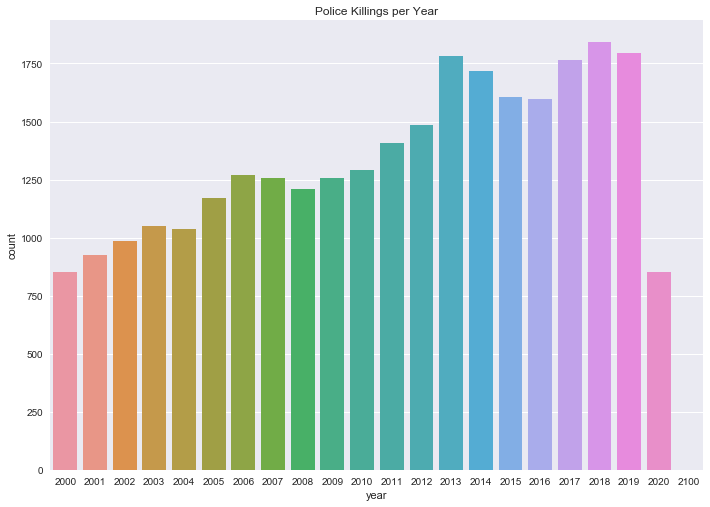

In [62]:
#custom chartsize
sns.set(rc={'figure.figsize':(11.7,8.27)})   

ax = sns.countplot(x='year', 
                   data=newdf).set_title("Police Killings per Year")

In [63]:
#Victims by state
newdf.pivot_table(index=['state'],
                         values = 'ID', 
                         aggfunc = 'count').sort_values('ID', ascending=False)


,ID
state,
CA,4524
TX,2484
FL,1688
GA,1057
IL,1032
OH,926
PA,914
MO,869
MI,833


In [65]:
#deadliest zip codes
newdf.zip.value_counts().nlargest(25)

60628.0    32
60616.0    32
60620.0    32
93307.0    27
33311.0    25
90221.0    24
60637.0    24
60624.0    24
60623.0    22
90044.0    22
90003.0    22
93706.0    22
64127.0    21
63113.0    21
85705.0    20
89101.0    20
90011.0    20
19140.0    20
93257.0    20
92410.0    20
60619.0    20
94509.0    20
60649.0    19
94565.0    19
87121.0    19
Name: zip, dtype: int64

In [67]:
#creat new dataframe
chartdf = webdata.pivot_table(index='race', 
                           values='threat_level', 
                           columns= 'armed', 
                           aggfunc = 'count',
                            fill_value = 0).reset_index()

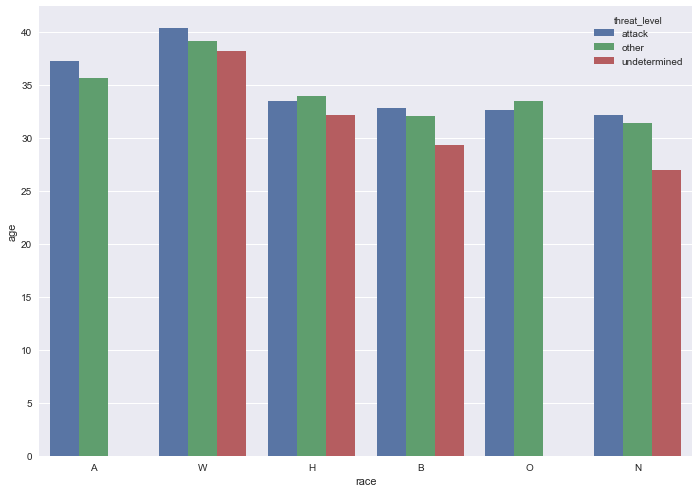

In [68]:
#barplot of victims by age for each race and threat level age is mean
sns.barplot(x='race', 
            y='age', 
            data=webdata,
           ci = False,
           hue='threat_level')

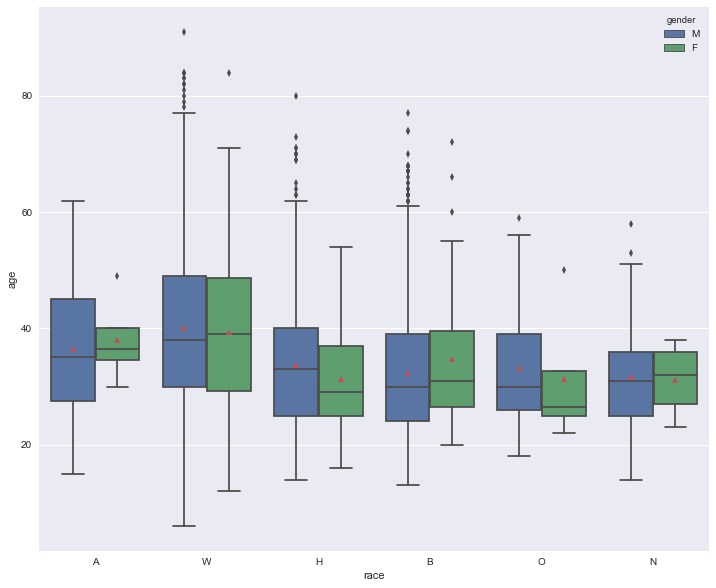

In [114]:
#boxplot of age by race and gender
sns.boxplot(x='race',
           y='age',
           hue='gender',
           showmeans=True,
           data=webdata)

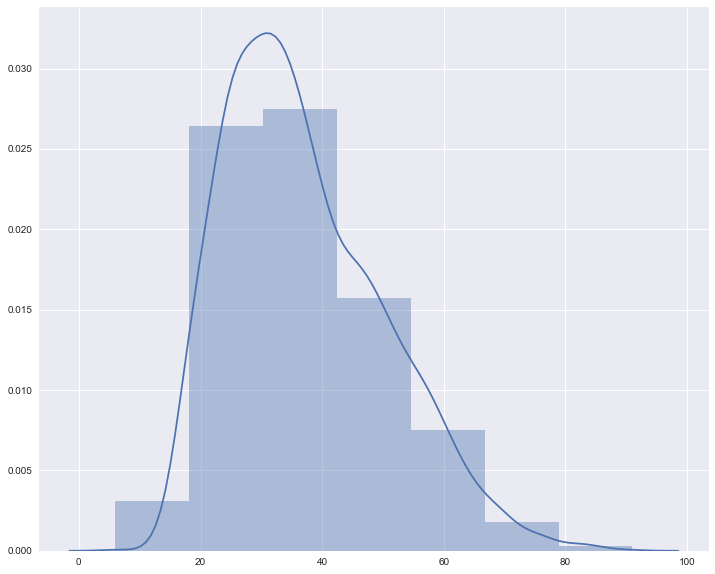

In [115]:
#distribution plot of age

x = webdata['age'].dropna().values

sns.set()
sns.distplot(x, bins=7)

In [69]:
sns.set(rc={'figure.figsize':(6,4)})  

from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
from IPython.display import clear_output
from ipywidgets import interact

### Interactive Chart of City Mortalities for Each State

In [71]:
#create list of states for dropdown
statelist=sorted(newdf[newdf.state.notna()]['state'].unique().tolist())

#create dropdown
state_id= ipw.Dropdown(options=statelist, 
                       description = 'Pick a State')
#show dropdown
display(state_id)

#creat and show output area
out = ipw.Output()
display(out)

#define function to draw chart on demand
def on_value_change(change):
    global newdf

    out.clear_output()
    with out:
        temp = newdf[newdf.state==state_id.value]
        fig = temp.city.value_counts().nlargest(10).plot(kind='bar');
        fig
        show_inline_matplotlib_plots()
        
#command to link dropdown to function
state_id.observe(on_value_change, names='value')

Dropdown(description='Pick a State', options=('AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'), value='AK')

Output()

In [72]:
state_id

Dropdown(description='Pick a State', index=18, options=('AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'), value='LA')

In [73]:
state_id.value = 'PA'

In [74]:
#same chart using interact decorator

statelist=sorted(newdf[newdf.state.notna()]['state'].unique().tolist())

@interact(state=statelist)
def plot_cities(state):
        temp = newdf[newdf.state==state]
        temp.city.value_counts().nlargest(10).plot(kind='bar');


interactive(children=(Dropdown(description='state', options=('AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'), value='AK'), Output()), _dom_classes=('widget-interact',))

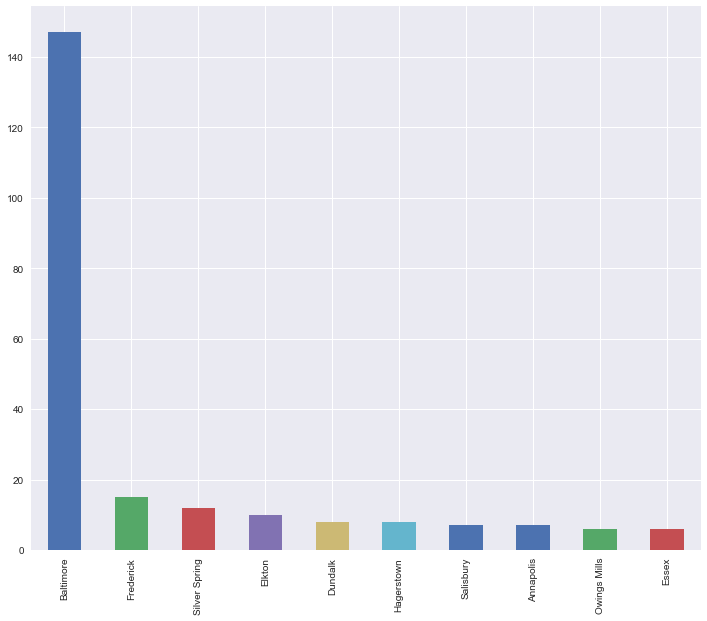

In [117]:
plot_cities('MD')

Baltimore          146
Frederick           15
Silver Spring       12
Elkton              10
Dundalk              8
Hagerstown           8
Salisbury            7
Annapolis            7
Glen Burnie          6
Owings Mills         6
Laurel               6
Capitol Heights      6
Essex                6
Bel Air              5
Randallstown         5
Name: city, dtype: int64


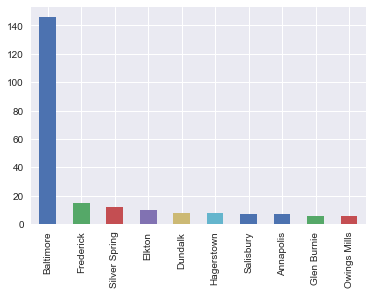

In [158]:
temp = newdf[newdf.state==state_id.value]

print(temp.city.value_counts().nlargest(15))
temp.city.value_counts().nlargest(10).plot(kind='bar');

In [70]:
newdf[(newdf.year > 2009) & (newdf.zip == 93307)]

,city,year,state,race,age,ID,county,zip,cause,agency
11682,Bakersfield,2010.0,CA,African-American/Black,15.0,9280.0,Kern,93307.0,Gunshot,Bakersfield Police Department
12790,Bakersfield,2011.0,CA,Hispanic/Latino,26.0,10158.0,Kern,93307.0,Gunshot,Bakersfield Police Department
12873,Bakersfield,2011.0,CA,Hispanic/Latino,35.0,10227.0,Kern,93307.0,Gunshot,Kern County Sheriff's Office
16557,Bakersfield,2013.0,CA,Hispanic/Latino,31.0,13487.0,Kern,93307.0,Gunshot,Bakersfield Police Department
16968,Bakersfield,2013.0,CA,Asian/Pacific Islander,45.0,13881.0,Kern,93307.0,Gunshot,Bakersfield Police Department
18001,Bakersfield,2014.0,CA,Hispanic/Latino,42.0,14886.0,Kern,93307.0,Gunshot,Kern County Sheriff's Office
18011,Bakersfield,2014.0,CA,African-American/Black,26.0,14903.0,Kern,93307.0,Gunshot,Bakersfield Police Department
19494,Bakersfield,2015.0,CA,Hispanic/Latino,47.0,16328.0,Kern,93307.0,Gunshot,Bakersfield Police Department
20428,Bakersfield,2016.0,CA,European-American/White,42.0,17205.0,Kern,93307.0,Gunshot,California Highway Patrol
21092,Bakersfield,2016.0,CA,Hispanic/Latino,30.0,17844.0,Kern,93307.0,Vehicle,Bakersfield Police Department


In [76]:
#cause of death of victims
pd.DataFrame(newdf.cause.value_counts(normalize=True)).style.format("{:.2%}")

,cause
Gunshot,71.03%
Vehicle,20.41%
Tasered,3.22%
Medical emergency,1.34%
Asphyxiated/Restrained,0.94%
Beaten/Bludgeoned with instrument,0.62%
Drug overdose,0.61%
Drowned,0.60%
Undetermined,0.35%
Fell from a height,0.26%


## Asian Victims

In [77]:
#subset dataframe for Asians
asians = newdf[newdf.race == 'Asian/Pacific Islander']

In [78]:
asians.state.value_counts()

CA    205
HI     60
TX     30
WA     26
MN     17
GA     14
NY     13
CO     11
IL     10
FL     10
WI      9
NV      9
MI      8
MO      7
LA      7
VA      6
UT      6
AZ      6
OR      6
NJ      6
MS      5
AK      4
OK      4
MD      4
PA      4
IN      3
KS      3
NC      3
OH      3
SC      3
TN      2
CT      2
NM      2
AR      2
NE      2
WV      1
AL      1
ME      1
ID      1
NH      1
IA      1
KY      1
MT      1
Name: state, dtype: int64

In [84]:
#temp = asians.pivot_table(index = ['state'], values='age', aggfunc=('count', 'mean', 'min', 'max'))

In [88]:
temp.sort_values('count', ascending=False).head(15)

,count,max,mean,min
state,,,,
CA,205,80.0,34.517073,1.0
HI,60,66.0,35.183333,10.0
TX,29,57.0,35.241379,16.0
WA,26,68.0,37.153846,16.0
MN,17,76.0,36.352941,15.0
GA,13,61.0,34.923077,19.0
NY,13,50.0,32.307692,21.0
CO,10,86.0,32.900000,5.0
FL,10,53.0,31.800000,21.0


#### Clean age column of NA so can calculate percentile

In [79]:
temp_ = newdf.dropna(subset=['age'])
temp_.shape

(27113, 10)

In [80]:
#identify 25th percentile by race
temp = temp_.pivot_table(index=['race'], values='age', aggfunc=('count', 
                                                                'min', 
                                                                lambda x: np.percentile(x, 25)))

In [120]:
temp.sort_values('count', ascending=False)

,<lambda>,count,min
race,,,
European-American/White,27.0,13230,1.0
African-American/Black,22.0,7542,1.0
Hispanic/Latino,23.0,4429,1.0
Race unspecified,25.0,761,2.0
Asian/Pacific Islander,25.0,517,1.0
Native American/Alaskan,23.0,272,1.0
Middle Eastern,21.0,48,16.0
Other Race,31.0,9,17.0
European American/White,18.0,5,17.0


In [81]:
pd.DataFrame(asians.cause.value_counts(normalize=True)).style.format("{:.2%}")

,cause
Gunshot,75.00%
Vehicle,19.42%
Tasered,1.92%
Asphyxiated/Restrained,1.35%
Beaten/Bludgeoned with instrument,0.58%
Drug overdose,0.58%
Drowned,0.38%
Medical emergency,0.38%
Undetermined,0.19%
Stabbed,0.19%


In [82]:
newdf.race.value_counts(normalize=True)

European-American/White    0.480784
African-American/Black     0.274646
Hispanic/Latino            0.164103
Race unspecified           0.049562
Asian/Pacific Islander     0.018730
Native American/Alaskan    0.009905
Middle Eastern             0.001729
Other Race                 0.000324
European American/White    0.000180
HIspanic/Latino            0.000036
Name: race, dtype: float64

## Black Victims

In [83]:
filter1 =newdf['race'] == 'African-American/Black'

blacks_only = newdf[filter1]
blacks_only.city.value_counts().nlargest(20)

Chicago         313
Houston         178
St. Louis       145
Philadelphia    136
Los Angeles     116
Detroit         109
Baltimore       109
Kansas City     104
Atlanta          96
Dallas           91
Columbus         82
Memphis          82
Jacksonville     80
Brooklyn         77
Washington       75
Oakland          75
Cleveland        71
Milwaukee        65
Newark           61
Richmond         58
Name: city, dtype: int64

In [84]:
unarmedblk = blacks_only[blacks_only.]

SyntaxError: invalid syntax (<ipython-input-84-ce2c4f69dc99>, line 1)

In [85]:
newdf.city.value_counts().nlargest(20)

Chicago          447
Houston          440
Los Angeles      405
Phoenix          247
Philadelphia     230
San Antonio      230
Kansas City      222
St. Louis        208
Las Vegas        195
Dallas           188
Detroit          173
Columbus         165
Oklahoma City    156
Albuquerque      151
Jacksonville     150
Baltimore        146
Atlanta          145
Miami            140
Fresno           134
Tucson           133
Name: city, dtype: int64

In [86]:
%matplotlib inline
#temp.year.value_counts()

In [87]:
#temp.year.value_counts().sort_values().plot(kind='bar', figsize=(12,12), sort_columns=True)
plotdf = pd.DataFrame(newdf.year.value_counts())
plotdf.reset_index(inplace=True)


In [88]:
plotdf.columns =['year_', 'value']

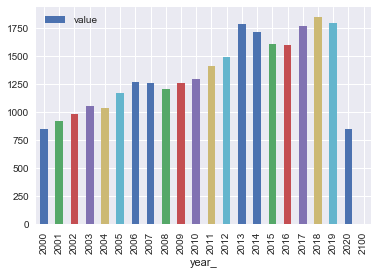

In [89]:
plotdf.sort_values('year_').plot(x='year_', y='value', kind='bar')


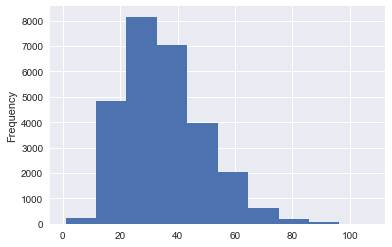

In [90]:
newdf.age.plot.hist()

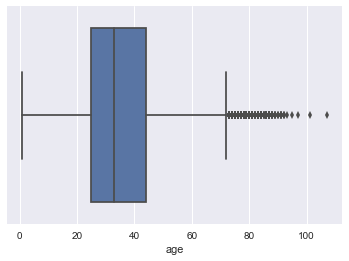

In [91]:
sns.boxplot(newdf.age)

In [92]:
newdf.age.describe()

count    27113.000000
mean        35.163132
std         13.772403
min          1.000000
25%         25.000000
50%         33.000000
75%         44.000000
max        107.000000
Name: age, dtype: float64

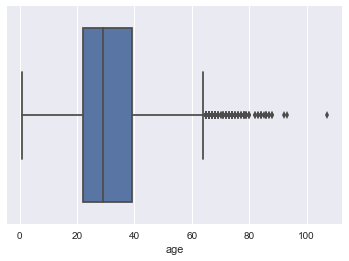

In [93]:
sns.boxplot(blacks_only.age)

In [94]:
blacks_only.age.describe()

count    7539.000000
mean       31.759252
std        12.638661
min         1.000000
25%        22.000000
50%        29.000000
75%        39.000000
max       107.000000
Name: age, dtype: float64

In [100]:
#blacks in a specific state
md_blacks = blacks_only[blacks_only.state=='MD']

In [101]:
md_blacks.age.describe()

count    248.000000
mean      31.451613
std       12.696300
min        1.000000
25%       21.750000
50%       29.000000
75%       39.250000
max       86.000000
Name: age, dtype: float64

In [102]:
newdf2 = pd.pivot_table(newdf, 
                        index = ['year', 'race'], 
                        values=['ID'], 
                        aggfunc = 'count')

In [103]:
newdf2.reset_index(inplace=True)

In [104]:
newdf2.plot(kind = 'bar',
            values = 'ID',
            x='year', y='race')

TypeError: Empty 'DataFrame': no numeric data to plot

In [105]:
newdf[newdf.county == 'Contra Costa'].describe()

,year,age,ID,zip
count,118.000000,116.000000,118.000000,118.000000
mean,2009.796610,33.155172,10848.974576,94610.576271
std,5.947864,13.268861,8125.277045,124.719885
min,2000.000000,2.000000,209.000000,94505.000000
25%,2005.250000,24.000000,4603.250000,94520.000000
50%,2010.000000,31.000000,9068.500000,94563.500000
75%,2015.000000,41.000000,16878.500000,94801.000000
max,2020.000000,76.000000,28074.000000,95037.000000
